# Lending Club Dataset - Kaggle 

### About the Dataset 

1. loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term - The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_term - Interest Rate on the loan
4. installments - The monthly payment owed by the borrower if the loan originates.
5. grade - LC assigned loan grade
6. sub_grade - LC assigned loan grade
7. emp_title - The job title supplied by the Borrower when applying for the loan.
8. emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership - he home ownership status provided by the borrower during registration or obtained from the credit      report. Our values are: RENT, OWN, MORTGAGE, OTHER
10. annual_inc - The self-reported annual income provided by the borrower during registration.
11. verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified.
12. issue_d = The month which the loan was funded.
13. loan_status - Current status of the loan
14. purpose - A category provided by the borrower for the loan request.
15. title - The loan title provided by the borrower.
16. zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.
17. addr_state - The state provided by the borrower in the loan application.
18. dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
19. earliest_cr_line - he month the borrower's earliest reported credit line was opened.
20. open_acc - The number of open credit lines in the borrower's credit file.
21. pub_rec -Number of derogatory public records.
22. revol_bal - Total credit revolving balance.
23. revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
24. total_acc - The total number of credit lines currently in the borrower's credit file.
25. initial_list_status - The initial listing status of the loan. Possible values are – W, F.
26. application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers.
27. mort_acc - Number of mortgage accounts.
28. pub_rec_bankruptcies - Number of public record bankruptcies.

### Importing the necessary libraries

In [227]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Reading in the Dataset

In [228]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [230]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [231]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Our goal is to identify the given person will pay the Loan fully or not making loan_status our target feature 

## Exploratory Data Analysis

c:\users\tejas\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

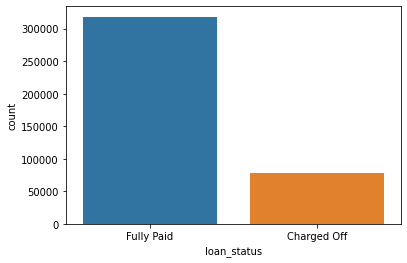

In [232]:
sns.countplot('loan_status',data=df)

In [233]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [234]:
df.corr().transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


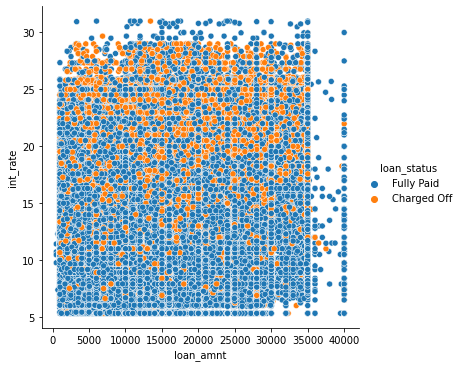

In [235]:
sns.relplot(x='loan_amnt',y='int_rate',hue='loan_status',data=df,kind='scatter')

### Loans with higher Interest rate were Charged off mostly 

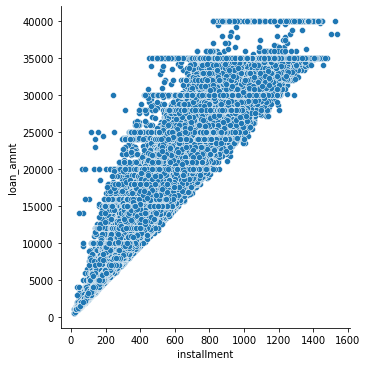

In [236]:
sns.relplot(y='loan_amnt',x='installment',data = df,kind='scatter')

### These points are highly correlated and follow a linear relationship (positive)

In [237]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [238]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

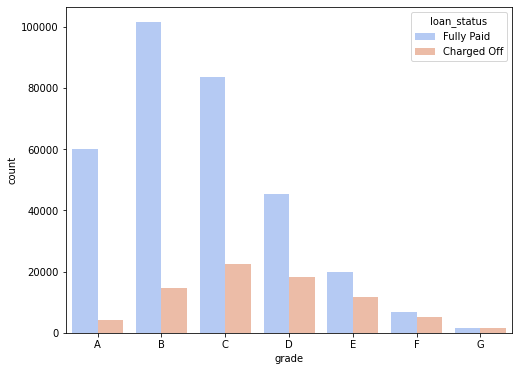

In [239]:
plt.figure(figsize=(8,6))
order_grade = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status',order = order_grade,palette='coolwarm')

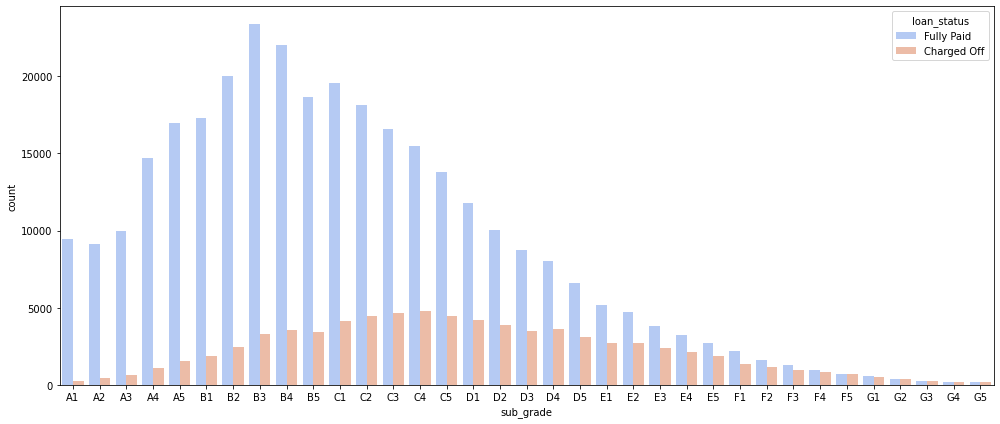

In [240]:
plt.figure(figsize=(14,6))
order_sub_grade = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=order_sub_grade,palette='coolwarm')
plt.tight_layout()

### Category of the loans falling under grade F and G are not paid whereas loans falling under catergories until E are paid by the customers

In [241]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

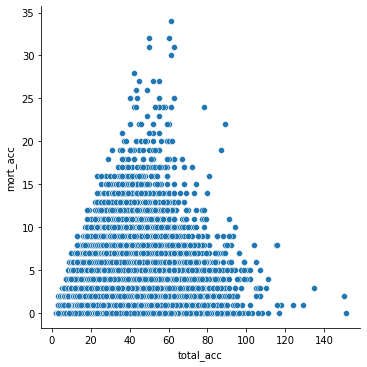

In [242]:
sns.relplot(x='total_acc',y='mort_acc',data=df,kind='scatter')

In [243]:
df['emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
State of MI                         1
Pcdata                              1
Associate Business Consultant       1
Stonewater Church                   1
Town of Marlborough                 1
Name: emp_title, Length: 173105, dtype: int64

In [244]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [245]:
df['emp_length'] = df['emp_length'].replace('< 1 year','1 year')

In [246]:
df['emp_length'].value_counts()

10+ years    126041
1 year        57607
2 years       35827
3 years       31665
5 years       26495
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [247]:
df['emp_length'].value_counts()

10+ years    126041
1 year        57607
2 years       35827
3 years       31665
5 years       26495
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [248]:
emp_length_avg = df.groupby('emp_length').mean()['annual_inc']

In [249]:
emp_length_avg

emp_length
1 year       69421.879702
10+ years    81262.885450
2 years      71768.216806
3 years      72862.784181
4 years      72788.310415
5 years      73185.418388
6 years      73610.048841
7 years      74013.635764
8 years      75466.537177
9 years      75514.539483
Name: annual_inc, dtype: float64

In [250]:
df['annual_inc'].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

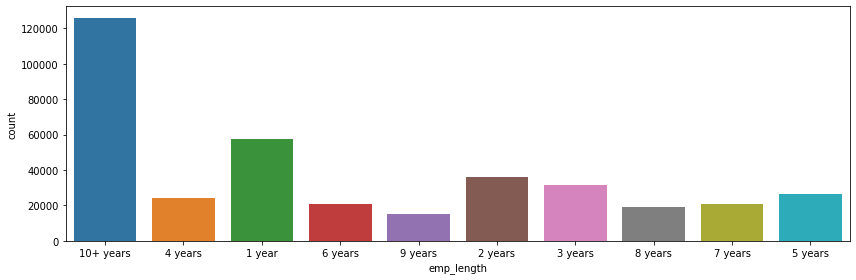

In [251]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df)
plt.tight_layout()

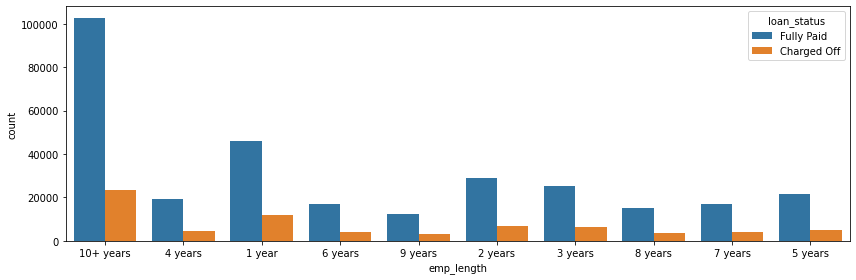

In [252]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,hue='loan_status')
plt.tight_layout()

#### As observed the most people do tend to pay of their lans where are there are some defaulters.

In [253]:
# def replace_emp_length(emp_length,annual_inc):
#     if annual_inc < 45000:
#         return emp_length ==1    
#     elif annual_inc in range (45001,55000):
#         return emp_length == 2
#     elif annual_inc in range(55001,67000):
#         return emp_length == 5
#     elif annual_inc in range(67001,85000):
#         return emp_length ==7
#     elif annual_inc > 85001:
#         return emp_length == 10
#     else: return df[emp_length]

In [254]:
# df['emp_length'] = df.apply( lambda x:replace_emp_length(x['emp_length'],x['annual_inc']),axis=1)

#### Tried to impute the mising values for the columns if it could've made any difference but the missing values for the feature emp_length and emp_title are 5 and around 4 percent respectively so dropping them won't be of any harm it seems plus the emp_title feature is a categorical feature and to convert it into the numeicals by dummy features will create a lot of features which might lead to curev of dimensionalaity, so dropping those columns is a good idea.

In [255]:
del df['emp_length']

In [256]:
del df['emp_title']

In [257]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [258]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [259]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [260]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [261]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### So the title and the purpose feature seem to be exactly the same whereas the title columns is missing some values so we might as well drop it because we are not gonna lose any information as the features represent identical values

In [262]:
del df['title']

In [263]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [264]:
df['revol_util'].isnull().sum()

276

In [265]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [266]:
df['pub_rec'].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
15.0         1
40.0         1
86.0         1
17.0         1
24.0         1
Name: pub_rec, dtype: int64

In [267]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

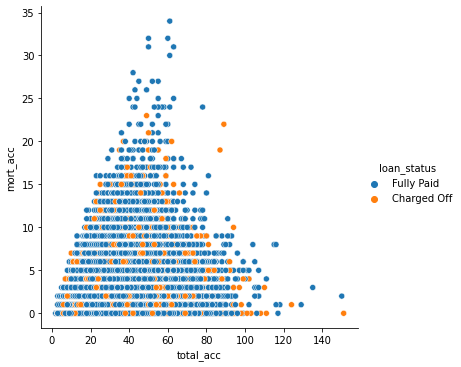

In [268]:
sns.relplot(x='total_acc',y='mort_acc',data=df,kind='scatter',hue='loan_status')

In [269]:
df['total_acc'].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
103.0        1
100.0        1
117.0        1
151.0        1
129.0        1
Name: total_acc, Length: 118, dtype: int64

In [270]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [271]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [272]:
acc_avg = df.groupby('total_acc').mean()['mort_acc']

#### From the relationship we can see here that we can use the total_acc feature to impute the missing values in the mort_acc feature

In [273]:
def replace_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return acc_avg[total_acc]
    else:
        return mort_acc

In [274]:
df['mort_acc'] = df.apply(lambda x: replace_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [275]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [276]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

#### The missing values in the dataframe are now for pub_rec and pub_rec_bankruptcies which are very less in number and wont actually affect our dataset's information so dropping the roes for those values.

In [277]:
df.dropna(inplace=True)

In [278]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Now that we have cleaned all the missing data lets do some Feature Engineering

In [279]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [280]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [281]:
df['term'] = df['term'].apply(lambda x:x[:3])

In [282]:
df['term'] = df['term'].apply(lambda x:int(x))

In [283]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### Now as the Grade and Subgrade are kinda similar features as sub_grade does define the grade feature as its the sub-category for the grade feature so dropping the grade feature

In [284]:
del df['grade']

In [285]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [286]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [287]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [288]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

In [291]:
del df['home_ownership']

In [294]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [295]:
dummies = pd.get_dummies(df['verification_status'],drop_first=True)
df= df.drop('verification_status',axis=1)
df = pd.concat([df,dummies],axis=1)

In [297]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'annual_inc', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'OTHER', 'OWN', 'RENT',
       'Source Verified', 'Verified'],
      dtype='object')

In [298]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

### We can grab the year from the issue_d column

In [301]:
df['Year'] = df['issue_d'].apply(lambda x: x[-4:])

In [303]:
df['Year'] = df['Year'].apply(lambda x: int(x))

In [305]:
del df['issue_d']

In [307]:
df['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [311]:
df['loan_status'] = df['loan_status'].replace('Fully Paid',1)

In [313]:
df['loan_status'] = df['loan_status'].replace('Charged Off',0)

In [314]:
df['loan_status'] 

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 395219, dtype: int64

In [315]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [316]:
dummies = pd.get_dummies(df['purpose'],drop_first=True)
df= df.drop('purpose',axis=1)
df = pd.concat([df,dummies],axis=1)

In [317]:
df

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,earliest_cr_line,open_acc,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,B4,117000.0,1,26.24,Jun-1990,16.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B5,65000.0,1,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,43057.0,1,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,54000.0,1,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,55000.0,0,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,40000.0,1,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,110000.0,1,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,56500.0,1,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,64000.0,1,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,0,0,0,0


In [319]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Nov-1950       1
Feb-1957       1
Jul-1960       1
Jul-1962       1
Nov-1957       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [321]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x[-4:])

In [323]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x))

In [325]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'initial_list_status', 'application_type', 'address'], dtype='object')

In [326]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df= df.drop('sub_grade',axis=1)
df = pd.concat([df,dummies],axis=1)

In [328]:
df.select_dtypes(['object']).columns

Index(['initial_list_status', 'application_type', 'address'], dtype='object')

In [331]:
dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
df= df.drop('initial_list_status',axis=1)
df = pd.concat([df,dummies],axis=1)

In [333]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [334]:
dummies = pd.get_dummies(df['application_type'],drop_first=True)
df= df.drop('application_type',axis=1)
df = pd.concat([df,dummies],axis=1)

In [337]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

#### We can convert these into zipcodes and check if we can see any patterns

In [340]:
df['zip_codes'] = df['address'].apply(lambda x: x[-5:])

In [342]:
df['zip_codes'] = df['zip_codes'].apply(lambda x:int(x))

In [344]:
df['zip_codes'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
813      45725
29597    45393
5113     45300
11650    11210
93700    11126
86630    10959
Name: zip_codes, dtype: int64

In [345]:
del df['address']

In [347]:
dummies = pd.get_dummies(df['zip_codes'],drop_first=True)
df= df.drop('zip_codes',axis=1)
df = pd.concat([df,dummies],axis=1)

In [348]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,JOINT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,1,26.24,1990,16.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,1,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,1,12.79,2007,13.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,1,2.60,2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,0,33.95,1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [349]:
df.columns

Index([           'loan_amnt',                 'term',             'int_rate',
                'installment',           'annual_inc',          'loan_status',
                        'dti',     'earliest_cr_line',             'open_acc',
                    'pub_rec',            'revol_bal',           'revol_util',
                  'total_acc',             'mort_acc', 'pub_rec_bankruptcies',
                      'OTHER',                  'OWN',                 'RENT',
            'Source Verified',             'Verified',                 'Year',
                'credit_card',   'debt_consolidation',          'educational',
           'home_improvement',                'house',       'major_purchase',
                    'medical',               'moving',                'other',
           'renewable_energy',       'small_business',             'vacation',
                    'wedding',                   'A2',                   'A3',
                         'A4',                   'A5

In [350]:
df['Year']

0         2015
1         2015
2         2015
3         2014
4         2013
          ... 
396025    2015
396026    2015
396027    2013
396028    2012
396029    2010
Name: Year, Length: 395219, dtype: int64

In [351]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

#### Year feature shows the year in which the loan was approved whereas, the earliest_cr_line shows us when the credit lien started so according to these  believe the column with the credit line is important so will be dropping the Year feature

In [352]:
del df['Year']

In [353]:
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,JOINT,5113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,1,26.24,1990,16.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,1,22.05,2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,1,12.79,2007,13.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,1,2.60,2006,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,0,33.95,1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,1,15.63,2004,6.0,0.0,...,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,1,21.45,2006,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,1,17.56,1997,15.0,0.0,...,0,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,1,15.88,1990,9.0,0.0,...,0,0,0,0,1,0,0,0,0,0


#### Here we have completed the Feature Engineering and now we have to move towards the model building part but first we need to scale the values and we will use MinMaxscaler for the same.

In [382]:
X= df.drop('loan_status',axis=1).values
y=df['loan_status'].values

In [386]:
from sklearn.model_selection import train_test_split

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
scaler = MinMaxScaler()

In [389]:
X_train = scaler.fit_transform(X_train)

In [390]:
X_test = scaler.transform(X_test)

In [391]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping

In [423]:
# early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [438]:
model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(loss = 'binary_crossentropy',optimizer='sgd')

In [439]:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=40,verbose=1,validation_data=(X_test,y_test))

Epoch 1/40
1236/1236 [==============================] - 12s 7ms/step - loss: 2.8743 - val_loss: 0.5012
Epoch 2/40
1236/1236 [==============================] - 7s 5ms/step - loss: 2.8040 - val_loss: 0.4633
Epoch 3/40
1236/1236 [==============================] - 8s 6ms/step - loss: 2.7664 - val_loss: 0.4140
Epoch 4/40
1236/1236 [==============================] - 6s 5ms/step - loss: 2.7611 - val_loss: 0.3968
Epoch 5/40
1236/1236 [==============================] - 7s 6ms/step - loss: 2.7313 - val_loss: 0.3736
Epoch 6/40
1236/1236 [==============================] - 7s 6ms/step - loss: 2.7327 - val_loss: 0.3671
Epoch 7/40
1236/1236 [==============================] - 7s 6ms/step - loss: 2.7174 - val_loss: 0.3556
Epoch 8/40
1236/1236 [==============================] - 8s 6ms/step - loss: 2.7027 - val_loss: 0.3499
Epoch 9/40
1236/1236 [==============================] - 8s 7ms/step - loss: 2.7097 - val_loss: 0.3501
Epoch 10/40
1236/1236 [==============================] - 7s 5ms/step - loss: 2.71

In [440]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

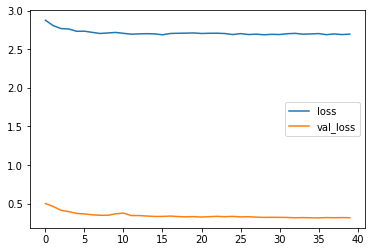

In [441]:
loss.plot()

## Model Evaluation and Genearating Predictions

In [442]:
predictions = model.predict_classes(X_test)

c:\users\tejas\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [443]:
from sklearn.metrics import classification_report,confusion_matrix

### Model Evaluations for predictions from the first model

In [444]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 7547  7874]
 [ 1122 62501]]


              precision    recall  f1-score   support

           0       0.87      0.49      0.63     15421
           1       0.89      0.98      0.93     63623

    accuracy                           0.89     79044
   macro avg       0.88      0.74      0.78     79044
weighted avg       0.88      0.89      0.87     79044



### Plotting the losses

<AxesSubplot:>

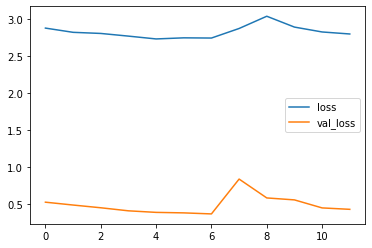

In [422]:
loss.plot()

### Designing a different model to evaluate if this can do a better job and then generatingthe predictions

In [445]:
early_stop_1 = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [446]:
model_1 = Sequential()
model_1.add(Dense(78,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(39,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(19,activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(1,activation='sigmoid'))
model_1.add(Dropout(0.2))

model_1.compile(loss = 'binary_crossentropy',optimizer='adam')

In [447]:
model_1.fit(x=X_train,y=y_train,batch_size=128,epochs=40,verbose=1,callbacks=[early_stop_1],validation_data=(X_test,y_test))

Epoch 1/40
2471/2471 [==============================] - 15s 6ms/step - loss: 2.7081 - val_loss: 0.3406
Epoch 2/40
2471/2471 [==============================] - 12s 5ms/step - loss: 2.6903 - val_loss: 0.3194
Epoch 3/40
2471/2471 [==============================] - 12s 5ms/step - loss: 2.6911 - val_loss: 0.3234
Epoch 4/40
2471/2471 [==============================] - 12s 5ms/step - loss: 2.6840 - val_loss: 0.3200
Epoch 5/40
2471/2471 [==============================] - 12s 5ms/step - loss: 2.6962 - val_loss: 0.3094
Epoch 6/40
2471/2471 [==============================] - 12s 5ms/step - loss: 2.6851 - val_loss: 0.3108
Epoch 7/40
2471/2471 [==============================] - 11s 5ms/step - loss: 2.6918 - val_loss: 0.3065
Epoch 8/40
2471/2471 [==============================] - 11s 5ms/step - loss: 2.6823 - val_loss: 0.3055
Epoch 9/40
2471/2471 [==============================] - 13s 5ms/step - loss: 2.6774 - val_loss: 0.3111
Epoch 10/40
2471/2471 [==============================] - 14s 6ms/step - l

In [448]:
loss_1 = pd.DataFrame(model_1.history.history)

<AxesSubplot:>

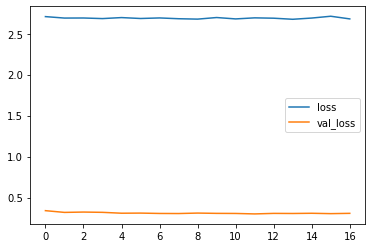

In [449]:
loss_1.plot()

In [450]:
preds = model_1.predict_classes(X_test)

c:\users\tejas\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Model Evaluations for predictions from second model

In [451]:
print(confusion_matrix(y_test,preds))
print('\n')
print(classification_report(y_test,preds))

[[ 8652  6769]
 [ 2757 60866]]


              precision    recall  f1-score   support

           0       0.76      0.56      0.64     15421
           1       0.90      0.96      0.93     63623

    accuracy                           0.88     79044
   macro avg       0.83      0.76      0.79     79044
weighted avg       0.87      0.88      0.87     79044



### Making Predictions with the first Model 

In [452]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

customer = df.drop('loan_status',axis=1).iloc[random_ind]
customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [453]:
model.predict_classes(customer.values.reshape(1,78))

c:\users\tejas\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

In [454]:
df.iloc[random_ind]['loan_status']

1.0

### Making Predictions with the second Model

In [466]:
import random
random_ind = random.randint(0,len(df))

customer_1 = df.drop('loan_status',axis=1).iloc[random_ind]
customer_1

loan_amnt       3250.00
term              36.00
int_rate          14.98
installment      112.64
annual_inc     58000.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 386086, Length: 78, dtype: float64

In [467]:
model_1.predict_classes(customer_1.values.reshape(1,78))

array([[1]])

In [468]:
df.iloc[random_ind]['loan_status']

1.0